<a href="https://colab.research.google.com/github/sarithamiryala/DeepLearningLab/blob/main/Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Step 1: Load Dataset
file_path = "/content/drive/MyDrive/DeepLearningLab/gold_price_data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
data.set_index('Date', inplace=True)




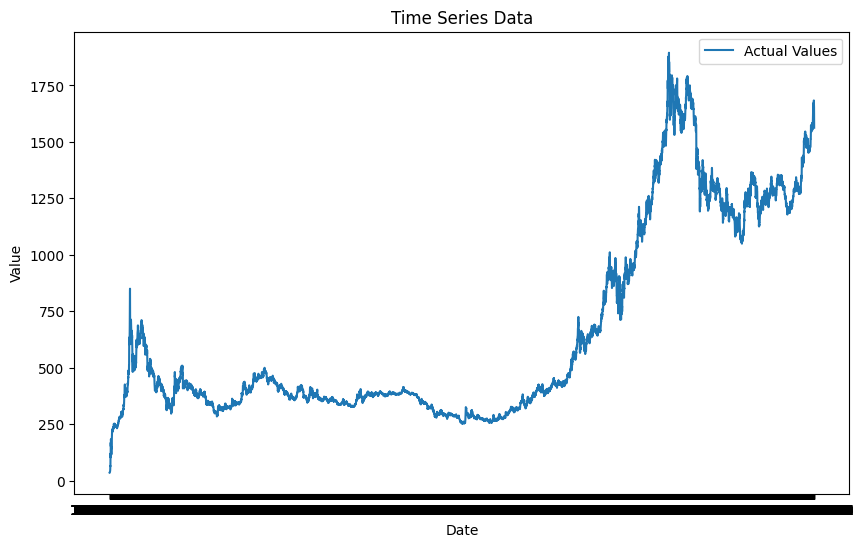

In [5]:
# Step 2: Visualize the Data
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label="Actual Values")
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [7]:
# Step 3: Resample (Optional, depending on your data frequency)
# Uncomment the line below if your data needs to be resampled (e.g., monthly)
# data = data.resample('M').mean()

# Step 4: Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



In [8]:
# Step 5: Create Sequences
def create_sequences(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
x, y = create_sequences(scaled_data, time_steps)
x = x.reshape((x.shape[0], x.shape[1], 1))



In [9]:
# Step 6: Train-Test Split
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [10]:
# Step 7: Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Step 8: Train the Model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0062 - val_loss: 0.0013
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4.0468e-05 - val_loss: 0.0022
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.1172e-05 - val_loss: 0.0022
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.6691e-05 - val_loss: 0.0026
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 4.6052e-05 - val_loss: 9.9883e-04
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.5676e-05 - val_loss: 0.0010
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.3284e-05 - val_loss: 9.9335e-04
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.4941e-05 - val_loss: 6.7574e-04
Epoch 9/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.3542e-05 - val_loss: 6.7548e-04
Epoch 10/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 3.5447e-05 - val_loss: 6.4843e-04
Epoch 11/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3.8099e-05 

In [12]:
# Step 9: Forecast
y_pred = model.predict(x_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))



68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


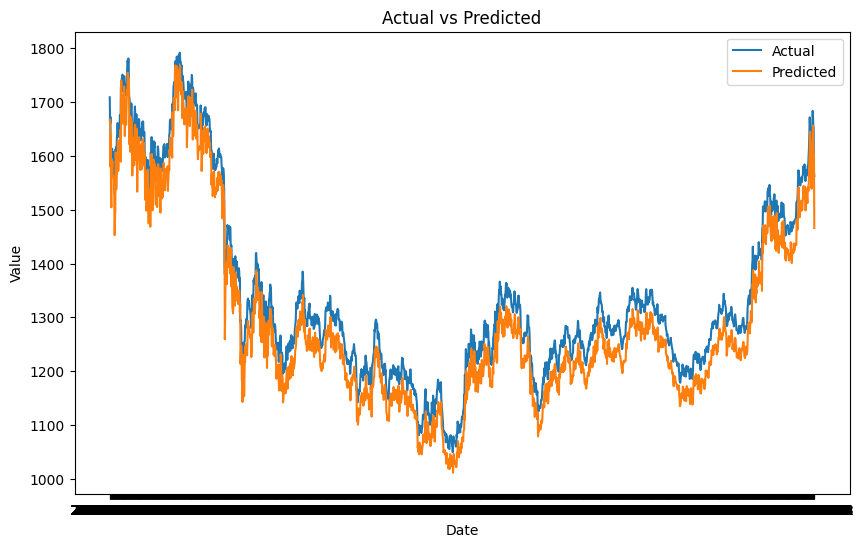

In [13]:
# Step 10: Visualize Predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test_rescaled, label="Actual")
plt.plot(data.index[-len(y_test):], y_pred_rescaled, label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()



In [15]:
# Save the Model
model.save("/content/drive/MyDrive/DeepLearningLab/time_series_forecasting_model.h5")